# DTSC 5301 Final Report

#### Authors and Attribution
* Bhavana Jonnalagadda: Data loading/cleaning/preprocessing, plot generation, website, editing
* Patrick Connelly: Data loading/cleaning/preprocessing, plot analysis, editing
* Grace Cooper : Introduction, biases, conclusion, editing
* Carl Klein: Plot generation, analysis
* Piya (Leo) Ngamkam: Plot analysis, plot editing
* Dhairya Veera: Plot analysis

## Introduction

Our group is performing a study on computer vision, focused on a comparison of facial recognition models, as the ultimate goal of this project.  Our current effort in this report is the first phase of the overarching project to identify and select appropriate source data for our final report.

Pursuant to the study, the team sought out multiple datasets on which we could evaluate the performance of two selected recognition models (Facebook's DeepFace and K. Karkkainen & J. Joo's Fair Face models) to generate performance data and perform statistical analysis on their ability to accurately identify race, age, and gender of a subject in a photograph.

Collectively, we landed on the UTK dataset to perform our evaluation: https://susanqq.github.io/UTKFace/  [(1)](#r1)

The UTK dataset is divided into three parts (1, 2, and 3).  The purpose of this effort is to execute a preliminary overview of the UTK dataset and perform some  statistics thereupon to determine whether we should pursue the next phase of our work using:

* a sample of the entire UTK dataset
* a specific "chunk" of the UTK dataset (i.e. part 1, part 2, or part 3)
* the entirety of the UTK dataset
* another dataset entirely

The outcome of this work is to support the teams readiness to move to the next phase of this effot with appropriate considerations for further analysis
* familiarity with dataset biases and limitations.
* methods for filtering and sampling from the totality of the dataset.

### Dataset Source and Description 

The dataset utilized for this project is the UTKFace dataset, a self-described "Large Scale Face Dataset". According to the dataset's own webpage, it is "...comprised of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc." (susanqq.github.io). The dataset is maintained by susanqq on GitHub, and was created by Yang Song and Zhifei Zhang, a research engineer at Adobe. The dataset has three main sets available for download from the main page: A set of "in-the-wild" faces, which are the raw unprocessed images. The second set is the Aligned & Cropped Faces, which have been cut down to allow facial algorithms to read them more easily. The final file is the Landmarks (68 points) dataset, which contains the major facial landmark points that algorithms use and process to examine the images.

In terms of the faces themselves, they comprise an age range of 0 to 116 years old. Each image has been annotated with the correct age, gender, and ethnicity, in order to not only track the data, but to support the training and accuracy of computer vision or facial recognition models. The faces are labelled either 0 or 1, for male and female respectively. Race is denoted as an integer from 0 to 4, for White, Black, Asian, Indian, and Others (Hispanic, Latino, Middle Eastern). Finally, each image has a date-time label of yyyymmddHHMMSSFFF, of when it was added to the UTK dataset. Overall, there are around 24,000 faces in total for the "In-The-Wild" portion of this dataset.

For ease of cloud storage, the datasets have been chunked into 3 sets: utk_1, utk_2, and utk_3.

The images were sourced from the internet. Some are shots of celebrities, others are taken from film or media, and others are mugshots or black-and-white photos. In terms of photo style and variety, there is wide variation between all of the images. There is also a noted variety of facial expressions, which helps to reduce biases within the data. However, there are still areas of concern, as noted below.

### Possible Sources of Bias

- Facial datasets can be extremely hard to categorize correctly, never mind reducing bias overall. Facial features that are androgynous or defer from the average features of the set can often be misrepresented or reported incorrectly. Those with features that make them look younger or older than their actual age may also be difficult for a computer to accurately guess. The level of variation in facial expression and angle present in the natural dataset may help reduce this issue through variation, but it is still worthwhile to point out.

- The datasets used for analysis contain solely male/masculine and female/feminine faces. As stated above, the faces are labelled either 0, for male, or 1, for female. There are no gender non-conforming/non-binary/trans faces or people reported in the datasets, which could introduce potential bias. This absence of an entire category of facial features could also result in inaccurate guesses should these faces be added to the data later. 

- The datasets do not report nationality or ethnicity. This can introduce inaccuracy in the part of the identification, and it also may identify the face in a racial group that the person identified would consider inaccurate. This is as much a matter of potentially inaccurate data as it is social labels. Many people from specific ethnic groups in disputed territories often identify themselves with labels that science and official documentation do not use or have not phased out. Numerous examples can be found all over the world. For instance, someone from a disputed background such as the Romani in Europe, may be misidentified. There is also the matter of people from multiracial backgrounds. The datasets fail to create a column for people with features from multiple ethnic groups. This sort of single-category labeling has its own set of issues, as it fails to consider an entire person's background, and is often rooted in old methods associated with system racism. It was a common practice in much of the U.S. to consider anyone with a degree of non-White heritage to be solely part of that ethnic group. While this line of thought is changing, it is still often present in academia. Of course, from a data-processing perspective, this would make identifying the facial data much more difficult. There is also a level of erasure associated with simply creating a "multi-racial" category, given that it would bin all multiracial faces together with no further consideration. That is to say, there is no ideal solution to the issue at this time. However, it is always worth pointing out potential biases in data, research, and analysis.

- The data given in the UTK dataset is composed purely of people who voluntarily submitted their faces for analysis. This introduces a potential sampling bias. After all, the faces included are only from those who would consider submitting their facial data to be a good thing, or at least non-negative. Given the topic, it is also likely to come from populations well-versed in technology, and also trust said technology. This has the potential to exclude those who will not or cannot submit their facial data. This can often include rural populations. Thus, the facial data present can be skewed towards urban residents or other characteristics, which can potentially create "lurking variables" that we aren't aware of within the data. This is a common problem that many Anthropological and Sociological studies face when collecting and analyzing data. Being aware of the possibility is often the first, and most crucial, step towards reducing it.

Overall, all of the given potential biases listed above are simply the largest and most easily identified. It is possible that other sources of bias are present in the data that we haven't noticed. And identifying these biases does not mean that the data is not sound, or that any conclusions drawn from it are invalid. It simply indicates that further research should be done and that this data is far from the most complete picture of human facial features and identification. It can, and should, be improved upon in later sets. However, compared to many sets of facial data in use today, the algorithms and data utilized here are still ahead of the proverbial curve. Many datasets analyzed by the creators of the FairFace algorithm were found to be majority white, often featuring few black, African, or Asian faces, and often leaving out groups such as Hispanic, Latin American, and Middle Eastern entirely. Thus, the impact of ensuring that these groups are represented is enormous. Ensuring unbiased data ensures that the conclusions drawn from it are sound and that any application in the real world is less likely to cause harm. Inaccurate facial recognition could affect its use in security systems, or identification software used by law enforcement. Therefore, it is imperative to keep these issues in mine while discussing and working with facial data.

## Data Processing

### Images to CSV Details

Each portion, or chunk, of the UTK dataset is an archive file, each with file sizes in the range of 50 MB to 500+MB per chunk.  It would be computationally expensive for one seeking to reproduce our results to download the totality of these image files, and the UTK dataset itself did not provide a CSV containing the data of all subject images within it.

We downloaded and decompressed these chunks, located here (https://drive.google.com/open?id=0BxYys69jI14kSVdWWllDMWhnN2c), and used the below code to iterate through the decompressed directories to get the names of every file.  Data about each image (specifically, the age, race, and gender of each subject) is encoded in the filename as follows:

[age]_[gender]_[race]_[timestamp]

We comment out the below code as running it would be computationally and time-intensive (and github won't allow us to store all the images in the repo). Instead, the outputs are stored in the CSV files included in the repo.

Our team produced 3 CSVs (UTKpart1, UTKpart2, and UTKpart3.csv) on a local machine, using the below code:

In [ ]:
# ##### get the raw file names and their standarized encoding to be human-readable 
# ##### and to generate CSVs for upload to our GitHub

# import pandas as pd, numpy as np

# def parse_to_readable(in_path,out_file):
#     all_jpg = [file t
#             for path, subdir, files in os.walk(in_path)
#             for file in glob(os.path.join(path,'*.jpg'))]
#     in_df = pd.DataFrame({'jpgs': all_jpg})
#     in_df['file']=(in_df['jpgs'].str.split('\\')).str[-1]
#     in_df=in_df.drop(labels=['jpgs'],axis=1)
#     in_df[['src_age','src_gender','src_race','src_timestamp']] = in_df['file'].str.split("_",expand=True)
#     # specify conditions for integer value to text race
#     race_int = [in_df['src_race']=='0',in_df['src_race']=='1',in_df['src_race']=='2',in_df['src_race']=='3',in_df['src_race']=='4']
#     race_str = ['White','Black','Asian','Indian','Other']
#     #specify conditions for integer value to text gender
#     gen_int=[in_df['src_gender']=='0',in_df['src_gender']=='1']
#     gen_str=['Male','Female']
#     #add race and gender columns given specified conditions above 
#     in_df['src_race']=np.select(race_int,race_str)
#     in_df['src_gender']=np.select(gen_int,gen_str)
#     in_df['src_age'] = in_df['src_age'].str.split('/').str[-1]
#     in_df['src_timestamp'] = in_df['src_timestamp'].str.split('.').str[0]
#     in_df.to_csv(out_file)

# parse_to_readable("C:\\Users\\[user]\\OneDrive\\Desktop\\[folder containing chunks]\\part1","C:\\Users\\[user]\\OneDrive\\Desktop\\[folder containing chunks]\\part1.csv")
# parse_to_readable("C:\\Users\\[user]\\OneDrive\\Desktop\\[folder containing chunks]\\part2","C:\\Users\\[user]\\OneDrive\\Desktop\\[folder containing chunks]\\part2.csv")
# parse_to_readable("C:\\Users\\[user]\\OneDrive\\Desktop\\[folder containing chunks]\\part3","C:\\Users\\[user]\\OneDrive\\Desktop\\[folder containing chunks]l\\part3.csv")

Generating these three CSVs and posting them to GitHub enabled our team to clean, format, and combine the data to generate summary statistics for the dataset.  

Reviewing the data, 4 files did not adhere to the prescribed naming convention.  Specifically, 61_1_20170109142408075.jpg, 61_3_20170109150557335.jpg, 39_1_20170116174525125.jpg, and 53__0_20170116184028385.jpg did not comply with the convention.  As such, we are excluding these items from our work, as we do not seek to incorrectly assume the missing data points for the records.

Our selected models for the next phase of our effort have differing methods for predicting age.  FairFace predicts age as a categorical variable in a specified range of ages (e.g. "10-19", "20-29", etc), whereas DeepFace predicts a specific numerical age.  To support our next phase, we append a column of src_age_grp to the source data to fit the information into the same groups as will be output by the FairFace model.  We also intend to perform the same operation on the output of DeepFace age predictions, such that both models can be compared on a categorical variable back to the source data.

In [1]:
# Imports

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
#import kaleido
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Settings for plot rendering, makes work with HTML output + jupyer lab + static output
# PNG doesn't work unless kaleido package is installed, which has to be manually done through the terminal
pio.renderers.default = "notebook+plotly_mimetype+png"

%matplotlib inline

Using the above code to generate our data in a human-readable format, and to import the necessary libraries for our work, we proceed to import, join, and produce aggregate visualizations of the data.  The next few code sections and plots provide summary views of the source dataset as individual "chunks" as well as the totality of the dataset (typically referred to as df_utk4 in plot legends).

In [2]:
# Read in the labels dataset and clean/normalize

# Read in from local csvs
options = dict(index_col=0, dtype={"src_gender": "category", "src_race": "category"})
df_utk_1 = pd.read_csv("data/UTK/UTKpart1.csv", **options)
df_utk_2 = pd.read_csv("data/UTK/UTKpart2.csv", **options)
df_utk_3 = pd.read_csv("data/UTK/UTKpart3.csv", **options)

bins = [0, 3, 10, 20, 30, 40, 50, 60, 70, np.inf]
group_names = ["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-130"]

for df in [df_utk_1, df_utk_2, df_utk_3]:
    # Create bins for the age ranges
    df["src_age_grp"] = pd.cut(df['src_age'], bins, right=False, labels=group_names)
    # Convert timestamp to python pandas native timestamp
    df["src_timestamp"] = pd.to_datetime(df["src_timestamp"], format="%Y%m%d%H%M%S%f")
    # Remove rows with invalid data
    df.drop(df[(df["src_gender"] == "0") | (df["src_race"] == "0")].index, inplace=True)
    # Re-categorize the categories since the invalid "0" was removed
    df["src_gender"].cat.remove_unused_categories(inplace=True)
    df["src_race"].cat.remove_unused_categories(inplace=True)

# Unified df
df_utk = pd.concat([df_utk_1, df_utk_2, df_utk_3], ignore_index=True)
# Convert object columns to categories again, as concatenation across categories doesn't work
df_utk[["src_gender", "src_race"]] = df_utk[["src_gender", "src_race"]].astype("category")
df_utk.head()

/shared-libs/python3.10/py/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



,file,src_age,src_gender,src_race,src_timestamp,src_age_grp
0,100_1_0_20170110183726390.jpg,100,Female,White,2017-01-10 18:37:26.392,70-130
1,100_1_2_20170105174847679.jpg,100,Female,Asian,2017-01-05 17:48:47.680,70-130
2,100_1_2_20170110182836729.jpg,100,Female,Asian,2017-01-10 18:28:36.728,70-130
3,101_1_2_20170105174739309.jpg,101,Female,Asian,2017-01-05 17:47:39.308,70-130
4,10_0_0_20161220222308131.jpg,10,Male,White,2016-12-20 22:23:08.132,10-19


## Plotting and Analysis

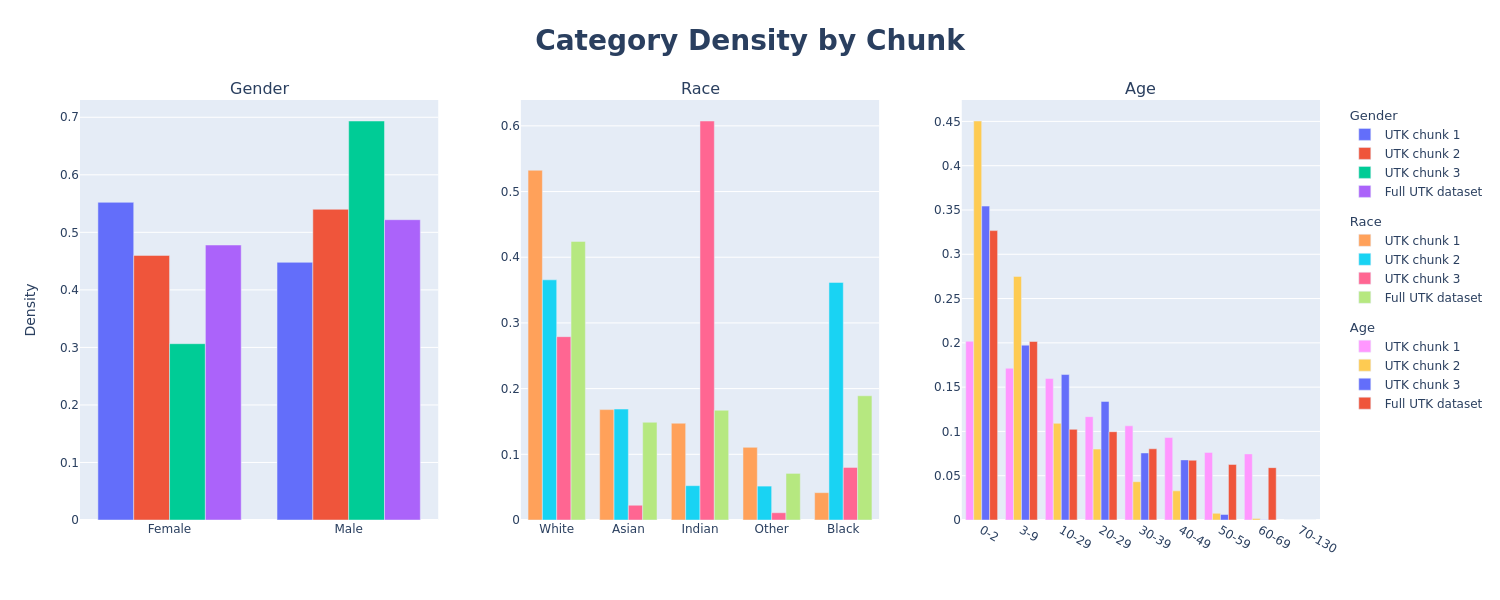

In [11]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Gender", "Race", "Age"))

# change age type to an ordered categorical variable
for df in [df_utk_1, df_utk_2, df_utk_3, df_utk]:
    df.src_age_grp = pd.Categorical(
        df.src_age_grp,categories=["0-2","3-9","10-29","20-29","30-39","40-49","50-59","60-69","70-130"],ordered=True
    )

# Plot bar plots of each factor, for each chuck of dataset + full
for i, df in enumerate([df_utk_1, df_utk_2, df_utk_3, df_utk]):
    fig.add_trace(
        go.Bar(
            legendgroup="Gender",legendgrouptitle=go.bar.Legendgrouptitle(text="Gender"), #PC - added to group legends
            x=list(df["src_gender"].value_counts().index), 
            y=list(df["src_gender"].value_counts(normalize=True)), 
            name=('UTK chunk '+str(i+1)) if i < 3 else "Full UTK dataset"
        ), row= 1, col = 1
    )
for i, df in enumerate([df_utk_1, df_utk_2, df_utk_3, df_utk]):
    fig.append_trace(
        go.Bar(
            legendgroup="Race",legendgrouptitle=go.bar.Legendgrouptitle(text="Race"),
            x=list(df["src_race"].value_counts().index), 
            y=list(df["src_race"].value_counts(normalize=True)), 
            name=('UTK chunk '+str(i+1)) if i < 3 else "Full UTK dataset"
        ), row = 1, col = 2
    )
for i, df in enumerate([df_utk_1, df_utk_2, df_utk_3, df_utk]):
    fig.append_trace(
        go.Bar(
            legendgroup="Age",legendgrouptitle=go.bar.Legendgrouptitle(text="Age"),
            x=(df["src_age_grp"].value_counts().index.sort_values()), #updated to sort on categorical levels
            y=(df["src_age_grp"].value_counts(normalize=True)), 
            name=('UTK chunk '+str(i+1)) if i < 3 else "Full UTK dataset"
        ), row = 1, col = 3
    )
fig.update_layout(height=600, width=1500, 
                    title_text="<b>Category Density by Chunk<b>", 
                    title_font_size= 28, title_x = 0.5,
                    yaxis_title = "Density"
                ) #did this to change plot width
fig.show()


Density by UTK Chunk and Gender (Figure 1a), by UTK Chunk and Race (Figure 1b), and UTK Chunk and Age (Figure 1c)

When evaluating the three chunks of the dataset as represented by the first three colored bars (blue, red, green) and comparing it with the overall complete dataset (the purple bar), we compared the ratio or distribution of the three parameters (gender, race and age group). First, considering the trends in the gender, we want the gender ratio to be equal, e.g. as close to 0.5 ratio to avoid dataset bias in our future work. Evaluating the graph, it is evident that the overall dataset is the one closest to this condition. Same holds true regarding the ratio of the races across the dataset. We seek reasonable representation for all the races present in the dataset, and the individual chunks don't do justice in that regard. Taking the dataset as a whole brings us closest to that condition, as it ensures a sufficient representation across all categorized races. When considering the age-groups, among all the chunks, df_utk_1 appears to be the most evenly distributed dataset for the age group. (df_utk_3 chunk has the most resemblance to the total dataset out of all the three chunks in terms of the ratio of age groups excluding 0-2, 3-9 and 10-19).  

We'll now evaluate the density of age and race proportions by age.  This allows our team to compare across multiple variables in the dataset simultaneously to examine imbalances, ...

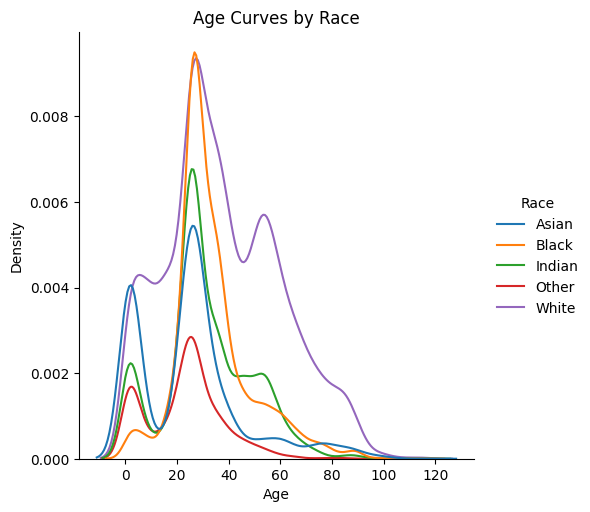

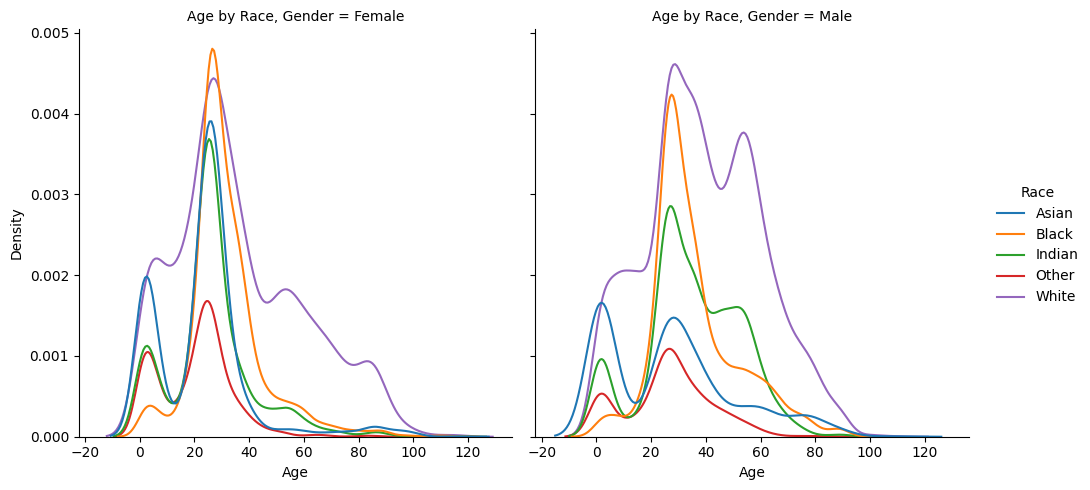

In [12]:
# Density Curves and Associated Statistics

# 1) age density curve by race
g = sns.displot(data = df_utk, x = 'src_age', kind = 'kde', hue = 'src_race')
g.set(title = 'Age Curves by Race', xlabel = 'Age')
g._legend.set_title('Race')

# 2) age density curve by race, separated by gender
g = sns.displot(data = df_utk, x = 'src_age', kind = 'kde', hue = 'src_race', col = 'src_gender')
g.set(xlabel = 'Age')
g._legend.set_title('Race')
g.set_titles("Age by Race, Gender = {col_name}")

# associated statistics for (2)
# break apart data by gender
df_female = df_utk[df_utk['src_gender']=='Female']
df_male = df_utk[df_utk['src_gender']=='Male']

Age by Race (top, Figure 2a), Age by Gender Female (bottom left, Figure 2b), Age by Gender Male (bottom right, Figure 2c)

Evaluating the density distribution of the age, categorized by the race, we derive the following insights on the dataset's structure.  The peaks in the first graph represent a greater number of people in defined age-groups and they are present in every race. The first peak is present at the age of 10 and the second one at around the age of 30. There is a prominent third peak at the age of around 60 for "Indian" and "White" races. Comparing the distribution for different races, it can be seen that the "white" race has the most available data for almost all age-groups and covers 42.4% of the entire dataset. All other races show a sharp dip in available data around 20 years old. The "white" race data also accounts for the majority of the data for age group of 40 and above, which could signify a bias in data towards "white" race over other races in this dataset. When looking at the latter two graphs for the gender, it can be seen that overall, there are more male subjects available throughout all ages and compared to female subjects except for the case with "asian" race, the numbers of which drops in case of males. Also, the dataset for females above the age of 60, are predominantly only of "white" race. 

### Analysis of True Differences in Means Across Data

The output of our work in this document is to increase our team's awareness of potential biases and additional considerations we must take into account as we pursue the next phase of this project.  As such, we seek to identify differences in age across other protected categories (race, gender) in the dataset.  Having familiarity with source data and its discrepancies, biases, and limitations are of importance when considering which dataset, or a specific subset of a dataset, would provide the best opportunity for sound statistical analysis.

We examine the dataset using QQ plots, density diagrams, bootstrap sampling, and plotting true mean ages per dataset to examine discrepancy between protected categories by age.  Our team plans to use these methods to truncate the data to a reasonable, processable subset on computer vision classification models.

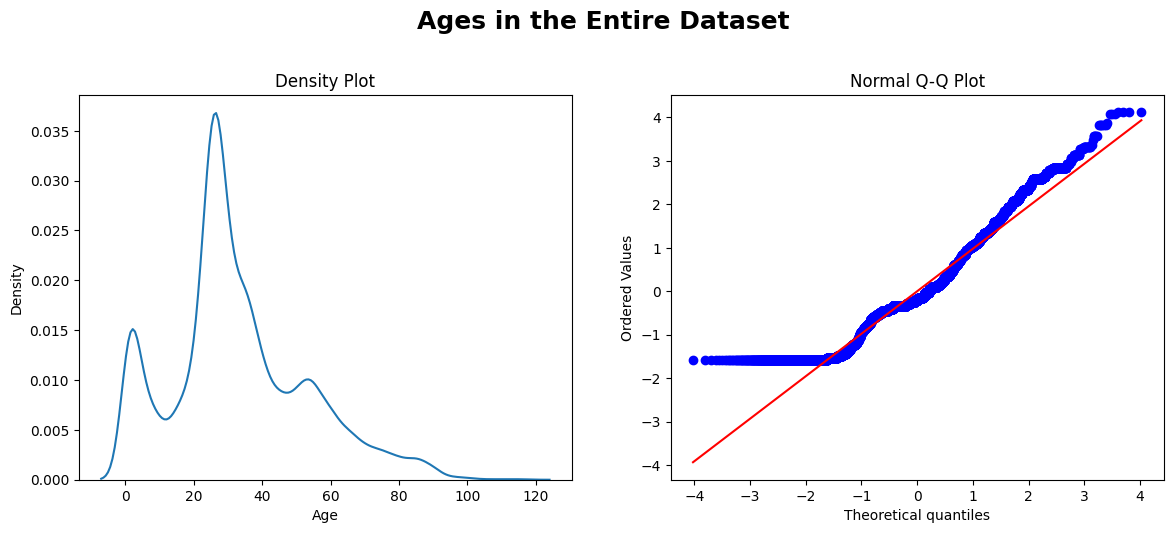

In [14]:
'''
Q-Q Plots
'''
# q-q
age_zscore = (df_utk['src_age'] - np.mean(df_utk['src_age'])) / np.std(df_utk['src_age'])

# let's plot the q-q plot and density plot side by side 
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.kdeplot(df_utk['src_age'], ax=axes[0]).set(title = "Density Plot", xlabel = "Age")
stats.probplot(age_zscore, dist = 'norm', plot = plt)
plt.title('Normal Q-Q Plot')
fig.show()
fig.suptitle('Ages in the Entire Dataset', weight = "bold", y = 1.05).set_fontsize('18')

Age Density Plot (Figure 3a) and Age Q-Q plot (Figure 3b)

A QQ plot can tell us how well, or poorly, points in a sample conform to a normal distribution.  Such a plot is built using z-scores for each evaluated point, which are computed as follows:

$$
    z = \frac{X-\mu}{\sigma}
$$ 

where $\mu$ is the sample mean, and $\sigma$ is the sample standard deviation.  Theoretically, z-scores within a normally distributed dataset will simply follow the proportion provided by the normal distribution.  The x-axis of a QQ plot provides us the theoretical value that a given point in the dataset *would* have, were it normally distributed, whereas the y-axis provides us the actual z-score for the entire sample.  Since both axes use the same value types and scale, we effectively evaluate the graph for a correlation value approaching the line $y=x$ that is to say that data points should predominantly congregate along a diagonal line moving bottom-to-top, left-to-right, on a 45$^o$ angle on the cartesian plane, as depicted in our QQ plot (red line).

Evaluating the blue dots (x=predicted vs. y=actual z-score) of our QQ plot, many records in this dataset do indeed congregate around that diagonal line, suggesting that at least some portion of our dataset may approach a normal distribution.  However, the tail at the left-end of the plot suggests that there may be a substantial over-representation of younger subjects within our source dataset.  Furthermore, a smaller tail above the red line at the right-end of our graph suggests that there may be a slight over-representation of more elderly groups within the dataset.  These insights are of interest to us, as such over-representation could impact our future work in comparing classifying models based upon their degree of accuracy in evaluating an image subject's age.

The plot to the left of the QQ plot is a simple density plot of age (converted to z-score).  This alternative view gives us the ability to inspect more specific regions in which we may have an excess of particular groups.  Examining the density plot reinforces our assessment and understanding of the QQ plot.  There is a distinct middle peak somewhere around 30 years old in the dataset, which may represent a mean for our data.  we also see some minor spikes in the very younger groups (0-2, 3-9 years old), and a minor peak between 50 and 60.  Absent these minor peaks, the data would be more likely to approach the normal distribution.

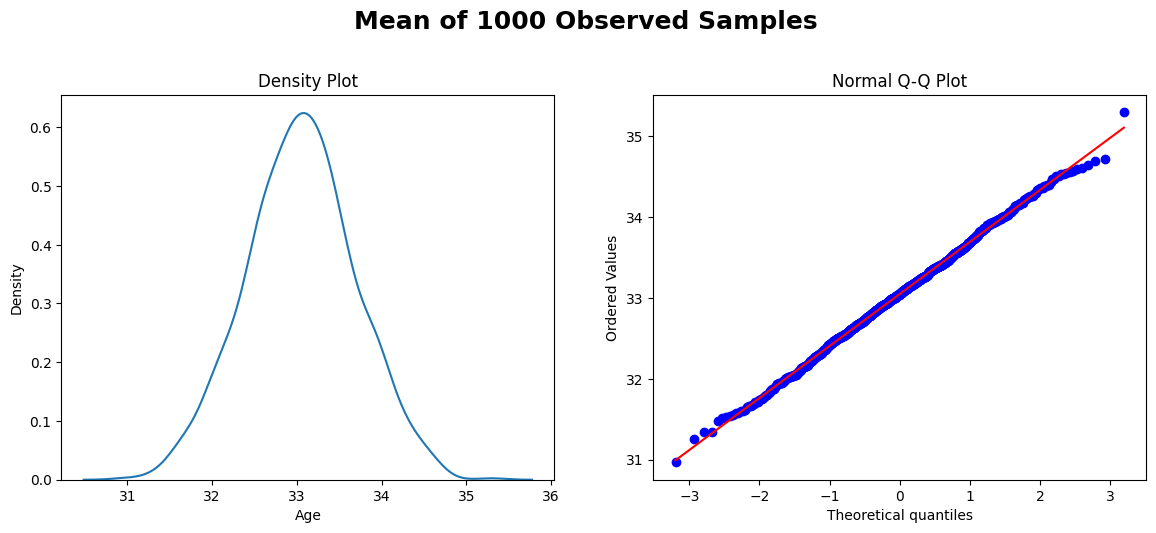

In [13]:
'''
Bootstrapping will create normal distributions and give us an idea of where the true statistics of the data lie
'''
# 1000 trials of of 1000 observed samples
ages = df_utk['src_age']
samples = []
for _ in range(1000):
    ages_samp = ages.sample(n=1000, replace=True)
    samples.append(ages_samp)

sample_means = [sample.mean() for sample in samples]

fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.kdeplot(sample_means, ax=axes[0]).set(title = "Density Plot", xlabel = "Age")
stats.probplot(sample_means, dist = 'norm', plot = plt)
plt.title('Normal Q-Q Plot')
fig.show()
fig.suptitle('Mean of 1000 Observed Samples', weight = "bold", y = 1.05).set_fontsize('18')

Mean of 1000 Observed Samples: Density Plot (Figure 4a) and Normal Q-Q Plot (Figure 4b)

### Mean of 1000 Observed Samples Analysis

Source sample data in experiments may not tell the full story with regard to true underlying statistics of the sample's population; we cannot make assumptions or conclusions about the population without further examination.  Here, we applied a bootstrap of our source data, sampling 1000 subjects, 1000 times.  Bootstrap sampling can help address skews in source data and provide some insights on the source population.  By applying the bootstrap to our dataset, we see a normal distribution emerge across the age variable and come to the conclusion that the true mean of the dataset's age is approximately 33. As the original age distribution is not normal, the bootstrapping method makes it easier for us to understand the true statistics.  

We can extend this bootstrap sampling further to evaluate across multiple variables.  Here, we compare the following:

- Mean age across the individual portions, or chunks, of the dataset (utk1, utk2, utk3)

- Mean age by gender (entire dataset)

- Mean age by race (entire dataset)

These cross-variable plots and comparisons can tell us more about the true means of subsets of the sample data compared to their given sample means.

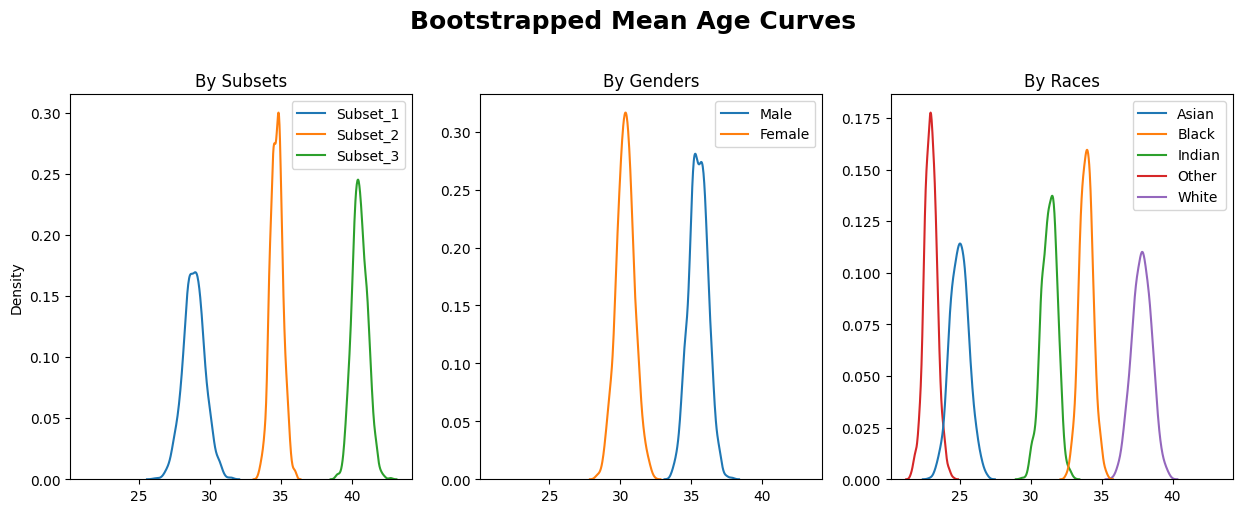

In [15]:
'''
mean age across three datasets, age, and race
'''

# Defining bootstrap

def bootstrap(data, sample_size=1000, trial_size=1000):
    # initialize samples storage
    samples = []
    # create samples and trials
    for _ in range(trial_size):
        sample = data.sample(n=sample_size, replace=True)
        samples.append(sample)

    sample_means = [sample.mean() for sample in samples]
    
    # return bootstrapped means
    return sample_means

# Mean age by dataset
utk_1_age = df_utk_1['src_age']
utk_2_age = df_utk_2['src_age']
utk_3_age = df_utk_3['src_age']

utk_1_bootstrap = bootstrap(data = utk_1_age)
utk_2_bootstrap = bootstrap(data = utk_2_age)
utk_3_bootstrap = bootstrap(data = utk_3_age)

dataset_means = pd.DataFrame({'Subset_1': utk_1_bootstrap,
                              'Subset_2': utk_2_bootstrap,
                              'Subset_3': utk_3_bootstrap})


# Mean age by gender

df_male_age = df_utk[df_utk['src_gender'] == 'Male'].src_age
df_female_age = df_utk[df_utk['src_gender'] == 'Female'].src_age

male_bootstrap = bootstrap(data = df_male_age)
female_bootstrap = bootstrap(data = df_female_age)

gender_means = pd.DataFrame({'Male': male_bootstrap,
                             'Female': female_bootstrap})


# Mean age by races

for race in df_utk['src_race'].unique():
    # create dataframe variables by race for potential later use
    exec(f"df_{race}_age = df_utk[df_utk['src_race']==race].src_age")


asian_bootstrap = bootstrap(data = df_Asian_age)
black_bootstrap = bootstrap(data = df_Black_age)
indian_bootstrap = bootstrap(data = df_Indian_age)
other_bootstrap = bootstrap(data = df_Other_age)
white_bootstrap = bootstrap(data = df_White_age)


race_means = pd.DataFrame({'Asian': asian_bootstrap,
                           'Black': black_bootstrap,
                           'Indian': indian_bootstrap,
                           'Other': other_bootstrap,
                           'White': white_bootstrap})

# Plotting subplots
#import seaborn as sns

fig, axes = plt.subplots(1, 3,sharex=True, figsize=(15,5))

sns.kdeplot(data = dataset_means, ax=axes[0]).set(title = "By Subsets")
sns.kdeplot(data = gender_means, ax=axes[1]).set(ylabel=None,title="By Genders")
sns.kdeplot(data = race_means, ax=axes[2]).set(ylabel=None, title = "By Races")

fig.suptitle('Bootstrapped Mean Age Curves', weight = "bold", y = 1.05).set_fontsize('18')

Mean Age Curves Breakdown by Subsets (Figure 5a), Genders (Figure 5b), and Races (Figure 5c).  

More availability of male data from age 40-80 has resulted in greater mean age for males than females.  By looking at the means of both the male and female, the overall mean lies somewhere between 32-34. Now when we look at the graph of the 1000 random sample, which is normally distributed, we can see that it peaks at 33 and thus supports the former observation.

Mean Age Curves Analysis

Evaluating the first subplot, we can confirm that there is an age imbalance among the three datasets, as the peaks of each of the subsets appear to be quite spaced out. The subset 1 seems to be the most spread out with regard to age data as the density is the lowest, suggesting a larger standard deviation and implying a shorter curve. Subset 2 appears to be the most concentrated (i.e. smaller standard deviation). From the gender graph, the standard deviation of both male and female appear to be similar. However, the male population mean age is 5 years greater than female population mean age, with the former being the age of 35 and the latter being 30. As observed in Figure 2c, a high volume of males around the age of 60 has resulted in this gap. Lastly, the third graph shows that the "Asian" and "Other" racial categories in the dataset are relatively younger being around the age of 24, whereas "White" is the oldest on average, sitting at approximately the age of 38.

Going through these graphs, it is evident that the dataset is not evenly distributed in term of age among datasets, genders, and races. Therefore, the bias should be acknowledged and addressed when pursuing before further analysis.

## Conclusion

Overall, we discovered imbalances between our numeric and categorical variables within the dataset and identified technical changes to our analysis methods going forward. First and foremost, the dataset should not be processed or analyzed solely as chunks for the purpose of future analyses and should instead be evaluated in its entirety or via bootstrapping for statistical analyses. In order to select an appropriate subset, our team should take a random sample of the entire dataset to allow for easier work on a smaller field while maintaining balance between our categorical variables (race and gender).  In terms of bias discovery, biases from age against race and gender are present.  More specifically, in analyzing the spread of age versus the spread of race and gender, we noted a disparity between older Asian faces across all datasets. The means for age distribution were not the same compared to gender or race. 

This initial evaluation is a key example of how biases can still appear in large, clearly labeled datasets. Even with precautions taken, it is easy for data to become skewed without anyone noticing until it is too late to change. It is also a reminder of how crucial oversight for computer vision is at this point in time, as datasets of this nature are available for use by developers to build and train new facial recognition and classification models. Datasets like UTK will often be used as part of crucial research and technology in the coming future. Facial profiling and recognition software is utilized in phones, door cameras, security systems, cars, and cutting-edge research in numerous fields. Going forward with our analysis, we must maintain vigilance when analyzing our own data and results, seeking to avoid unnecessary bias.

From this initial dataset analysis, our methods for the next phase of our work should account for the disparities between age, race, and gender within the complete dataset.  We plan to use the data in its totality when evaluating select facial recognition models for their accuracy in categorizing age, gender, and race.  To avoid skews in the results and to avoid an unsound analysis, we will likely have to pursue similar bootstrap sampling of the categorizations produced by the selected models.

## References / Citations
1. <a name="r1" id="r1"></a>  Zhang, & Qi, H. (2017). Age Progression/Regression by Conditional Adversarial Autoencoder. In IEEE Conference on Computer Vision and Pattern Recognition (CVPR).

2. <a name="r2" id="r2"></a> Karkkainen, K., & Joo, J. (2021). FairFace: Face Attribute Dataset for Balanced Race, Gender, and Age for Bias Measurement and Mitigation. In Proceedings of the IEEE/CVF Winter Conference on Applications of Computer Vision (pp. 1548–1558).

3. <a name="r3" id="r3"></a>  Serengil, S., & Ozpinar, A. (2020). LightFace: A Hybrid Deep Face Recognition Framework. In 2020 Innovations in Intelligent Systems and Applications Conference (ASYU) (pp. 23-27).


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ae83024-fcbb-422f-b919-cd8e41a39100' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>